In [1]:
from collections import defaultdict
import random
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress


# Zadanie 1 Model rosnącego grafu scale-free: Barabaasi-Albert (BA)
Implementacja własna modelu BA

In [2]:
class Node:
  def __init__(self):
    pass

class BiGraph:

  def __init__(self, nodes):
    self.graph = defaultdict(list)
    for node in nodes:
      self.graph[node] = []

  def add_edge(self,node,neighbour):  
    self.graph[node].append(neighbour)
    self.graph[neighbour].append(node)

  def to_networkx(self):
    G = nx.from_dict_of_lists(self.graph)

    return G.to_undirected()

def barabasi_albert_graph(n, m):
  if m < 1 or m >= n:
    raise ValueError("m must be: m < 1 and m >= n")

  selected_nodes = []
  for i in range(m):
    selected_nodes.append(Node())
    
  G = BiGraph(selected_nodes)

  nodes_to_select = []


  for i in tqdm(range(m, n)):
    new_node = Node()
    for node in selected_nodes:
      G.add_edge(new_node, node)
    
    nodes_to_select.extend(selected_nodes)
    nodes_to_select.extend(m * [new_node])

    selected_nodes = random.choices(nodes_to_select, k=m)

  return G  

1. Wygeneruj kilka grafów BA, przykładowo dla (m,n)∈ {(3,10^2),(3,10^3),(2,10^5),(3,10^5)}

In [3]:
G1 = barabasi_albert_graph(10 ** 2, 3).to_networkx()

  0%|          | 0/97 [00:00<?, ?it/s]

In [4]:
G2 = barabasi_albert_graph(10 ** 3, 3).to_networkx()

  0%|          | 0/997 [00:00<?, ?it/s]

In [5]:
G3 = barabasi_albert_graph(10 ** 5, 2).to_networkx()

  0%|          | 0/99998 [00:00<?, ?it/s]

In [6]:
m = 3
G4 = barabasi_albert_graph(10 ** 5, m).to_networkx()

  0%|          | 0/99997 [00:00<?, ?it/s]

2. Narysuj rozkład stopni wierzchołków każdego wygenerowanego grafu w skali log-log. Korzystając, z regresji liniowej, wyznacz wartość wykładnika γ. Podaj uzyskane wartości w sprawozdaniu. P(k)∼k^γ

2.8559478298945544


Text(0, 0.5, 'Frequency')

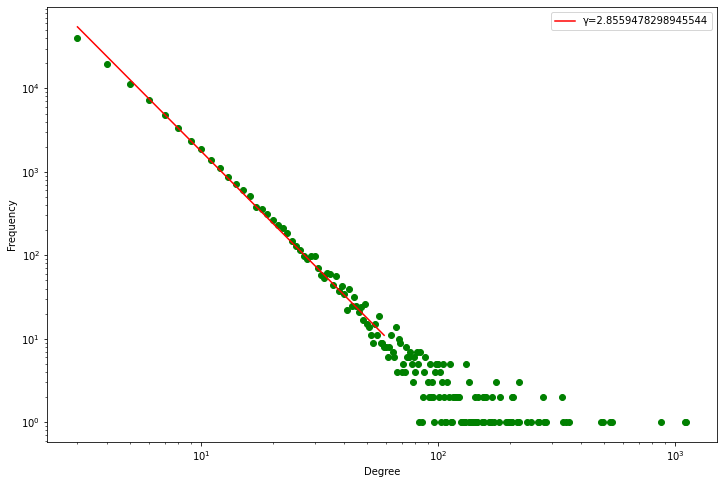

In [ ]:
def powerfit(x, y):
    gamma, m = np.polyfit(np.log(x), np.log(y), 1)
    return np.exp(m) * x**(gamma), gamma

degree_freq = nx.degree_histogram(G4)
degrees = range(len(degree_freq))

ys, gamma = powerfit(degrees[m:60], degree_freq[m:60])

print(-gamma)
plt.figure(figsize=(12, 8)) 
plt.loglog(degrees[m:], degree_freq[m:],'go') 
plt.plot(degrees[m:60], ys, 'r', label=f'γ={-gamma}')
plt.legend()
plt.xlabel('Degree')
plt.ylabel('Frequency')

γ w powyższym przykładzie równała się w przybliżeniu 2.856. 

3. Korzystając z biblioteki networkx i dwóch wybranych metod osadzania wierzchołków (layout) narysuj wygenerowane grafy dla n <= 1000. Kolor, bądź promień wierzchołka powinien odzwierciedlać jego stopień.

**m=3, n=10^2**

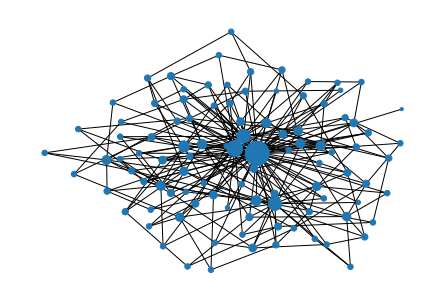

In [ ]:
pos = nx.spring_layout(G1)
d = dict(nx.degree(G1))

nx.draw(G1,pos, nodelist=d.keys(), node_size=[v * 10 for v in d.values()])

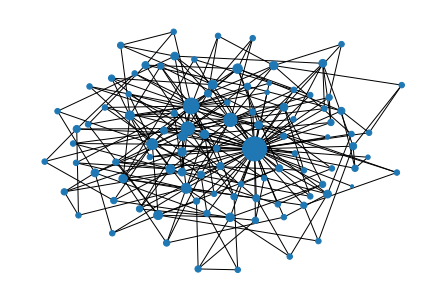

In [ ]:
pos = nx.kamada_kawai_layout(G1)

d = dict(nx.degree(G1))

nx.draw(G1,pos, nodelist=d.keys(), node_size=[v * 10 for v in d.values()])

**m=3, n=10^3**

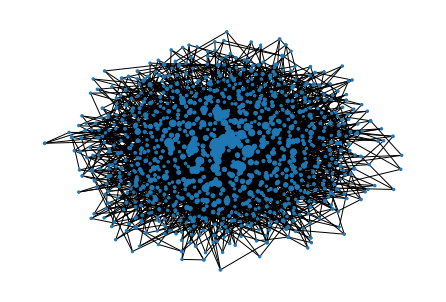

In [ ]:
pos = nx.spring_layout(G2)
d = dict(nx.degree(G2))

nx.draw(G2,pos, nodelist=d.keys(), node_size=[v * 2 for v in d.values()])

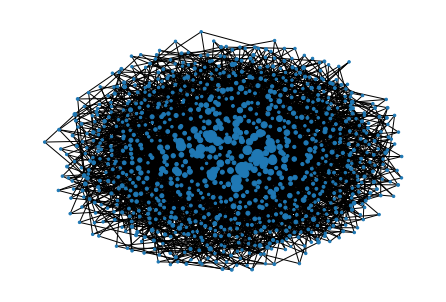

In [ ]:
pos = nx.kamada_kawai_layout(G2)

d = dict(nx.degree(G2))

nx.draw(G2,pos, nodelist=d.keys(), node_size=[v * 2 for v in d.values()])

# Zadanie 2 Odporność grafu scale-free na błędy i ataki

1. Niech f oznaczna procent wierzchołków usuniętych z grafu zgodnie z dwoma strategiami:

A. losowy błąd (usunięcie losowo wybranego wierzchołka - równomierny rozkład prawdopodobieństwa)

B. atak (usunięcie losowego wierzchołka - prawdopodobieństwo proporcjonalne do jego stopnia)

In [69]:
import random
from networkx.algorithms.efficiency_measures import global_efficiency
from networkx import average_shortest_path_length
from itertools import chain
import statistics

def random_error(G, f=0.01):
  G = G.copy()
  global_efficiencies = []
  average_shortest_path_lengths = []
  number_of_nodes = G.number_of_nodes()
  number_of_nodes_to_delete = round(f * number_of_nodes)
  global_efficiencies.append(global_efficiency(G))
  average_shortest_path_length = statistics.mean(chain.from_iterable(x.values() for x in dict(nx.shortest_path_length(G)).values()))
  average_shortest_path_lengths.append(average_shortest_path_length)

  for i in tqdm(range(90)):
    list_of_nodes = G.nodes()
    random_sample = random.sample(list_of_nodes, number_of_nodes_to_delete)
    G.remove_nodes_from(random_sample)
    global_efficiencies.append(global_efficiency(G))
    average_shortest_path_length = statistics.mean(chain.from_iterable(x.values() for x in dict(nx.shortest_path_length(G)).values()))
    average_shortest_path_lengths.append(average_shortest_path_length)

  return global_efficiencies, average_shortest_path_lengths

def attack(G, f=0.01):
  G = G.copy()
  global_efficiencies = []
  average_shortest_path_lengths = []
  number_of_nodes = G.number_of_nodes()
  number_of_nodes_to_delete = round(f * number_of_nodes)
  global_efficiencies.append(global_efficiency(G))
  average_shortest_path_length = statistics.mean(chain.from_iterable(x.values() for x in dict(nx.shortest_path_length(G)).values()))
  average_shortest_path_lengths.append(average_shortest_path_length)
  
  for i in tqdm(range(90)):
    d = dict(nx.degree(G))
    list_of_nodes = d.keys()
    sum_of_frequencies = sum(d.values())
    if sum_of_frequencies == 0:
      random_sample = random.sample(list_of_nodes, number_of_nodes_to_delete)
    else:
      random_sample = np.random.choice(list(d.keys()),number_of_nodes_to_delete,replace=False, p=[x / sum_of_frequencies for x in list(d.values())])
    G.remove_nodes_from(random_sample)
    global_efficiencies.append(global_efficiency(G))
    average_shortest_path_length = statistics.mean(chain.from_iterable(x.values() for x in dict(nx.shortest_path_length(G)).values()))
    average_shortest_path_lengths.append(average_shortest_path_length)
  return global_efficiencies, average_shortest_path_lengths


2. Wykorzystując dwa deskryptory grafowe: efektywność oraz średnia  długość  najkrótszej  ścieżki zbadaj odporność grafu BA z zadania 1 na błędy (A) i ataki (B) wyznaczająć zależności E(f) oraz L(f). Dokonaj interpretacji uzyskanych wyników.

In [71]:
xs = np.linspace(0, 90, num=91)
y_random_efficiency, y_random_average_shortest_path_length = random_error(G2)
y_attack_efficiency, y_attack_average_shortest_path_length = attack(G2)

  0%|          | 0/90 [00:00<?, ?it/s]

  0%|          | 0/90 [00:00<?, ?it/s]

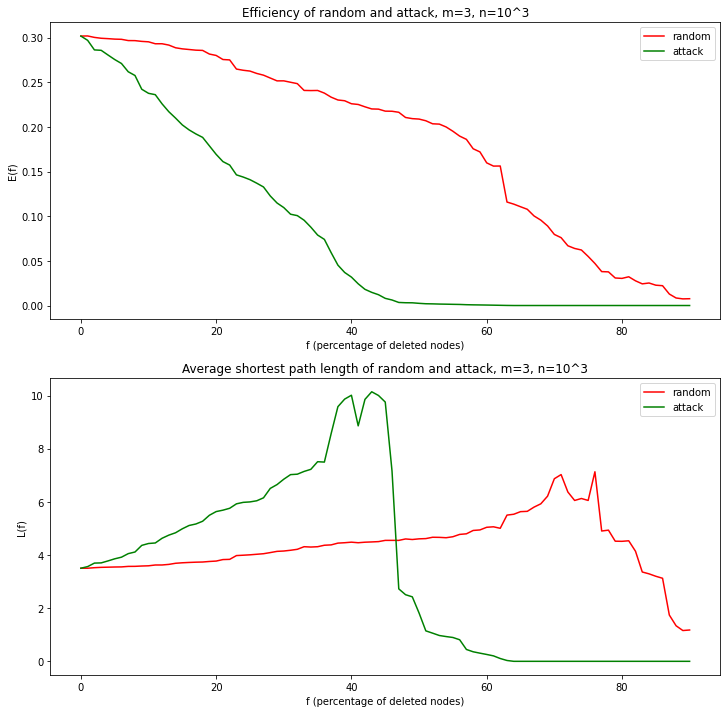

In [73]:
fig, (ax1, ax2) = plt.subplots(2,figsize=(12,12))
ax1.plot(xs, y_random_efficiency, 'r', label='random')
ax1.plot(xs, y_attack_efficiency, 'g', label='attack')
ax1.set_title('Efficiency of random and attack, m=3, n=10^3')
ax1.set(xlabel='f (percentage of deleted nodes)', ylabel='E(f)')
ax1.legend()
ax2.plot(xs, y_random_average_shortest_path_length, 'r', label='random')
ax2.plot(xs, y_attack_average_shortest_path_length, 'g', label='attack')
ax2.set_title('Average shortest path length of random and attack, m=3, n=10^3')
ax2.set(xlabel='f (percentage of deleted nodes)', ylabel='L(f)')
ax2.legend()
plt.show()

Reakcja scale-free network o tym samym rozmiarze na ataki i losowe awarie jest inna. W przypadku losowych awarii efektywnosc sieci zmniejsza się powoli. W przypadku ataku efektywność zmniejsza się znacznie szybciej i już przy f równym około 46% efektywność sieci równała się 0. 

Przy średniej długości najkrótszej ścieżki, losowe awarie miały stałą wartość, natomiast atak podwyższał wartość, aż do momentu kiedy graf miał 0 efektywność.

Efektywność według mnie lepiej opisuje system.

In [63]:
G = nx.path_graph(5)
p = nx.shortest_path_length(G, source=0)

In [64]:
dict(p)

{0: 0, 1: 1, 2: 2, 3: 3, 4: 4}